In [1]:
import numpy as np
from IPython.display import clear_output

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from convectionDifusion import ConvectionDiffussion 

# 1. Equations

[Wikipedia](https://en.wikipedia.org/wiki/Convection%E2%80%93diffusion_equation) says: 

The general Convection–diffusion equation is:

\begin{equation*}
{\displaystyle {\frac {\partial c}{\partial t}}=\mathbf {\nabla } \cdot (\kappa \mathbf {\nabla } c)-\mathbf {\nabla } \cdot (\mathbf {v} c)+R}
\end{equation*}

In a common situation, the diffusion coefficient is constant, there are no sources or sinks, and the velocity field describes an incompressible flow (i.e., it has zero divergence). Then the formula simplifies to:

u = flow in x-direction

v = flow in y-direction

\begin{equation*}
\displaystyle {\frac {\partial c}{\partial t}}=\kappa \nabla ^{2}c-\mathbf {v} \cdot \nabla c
\end{equation*}

\begin{equation*}
\displaystyle {\frac {\partial c}{\partial t}}=\kappa \nabla ^{2}c- u \displaystyle {\frac {\partial c}{\partial x}} - v \displaystyle {\frac {\partial c}{\partial y}}
\end{equation*}

\begin{equation*}
\displaystyle {\frac {\partial c}{\partial t}}=\kappa \displaystyle {\frac {\partial  ^{2} c}{\partial x ^{2}}} + \kappa \displaystyle {\frac {\partial  ^{2} c}{\partial y  ^{2}}}- u \displaystyle {\frac {\partial c}{\partial x}} - v \displaystyle {\frac {\partial c}{\partial y}}
\end{equation*}

# 2. Numeric solution

* central differences in space
* Euler foreward in time

Resulting in the following stability conditions:

\begin{equation}
\displaystyle {\frac {\kappa \Delta t}{\Delta x ^ 2}} = q < \displaystyle {\frac {1}{2}}
\end{equation}

\begin{equation*}
|\displaystyle {\frac {u \Delta x}{\kappa}}| = |P_{\Delta}| < 2
\end{equation*}


With the discretisation:


\begin{equation*}
\displaystyle {\frac  {c(x=0,y=0,t=1)-c(x=0,y=0,t=0)}{\Delta t}} = \\
\kappa {\frac  {c(x=-1,y=0,t=0)-2c(x=0,y=0,t=0)+c(x=1,y=0,t=0)}
{\Delta x^{2}}} + \\
\kappa {\frac  {c(x=0,y=-1,t=0)-2c(x=0,y=0,t=0)+c(x=0,y=1,t=0)}
{\Delta x^{2}}} - \\
u{\frac  {c(x=1,y=0,t=0)-c(x=-1,y=0,t=0)}
{2\Delta x}} - \\
v{\frac  {c(x=0,y=1,t=0)-c(x=0,y=-1,t=0)}
{2\Delta x}}
\end{equation*}

# 3. Generate flow field

In [9]:
def circulair_flow(x,y,t):
    L = x[0,-1,0]
    B = y[0,0,-1]

    r = ((x-B/2)**2 + (y-L/2)**2)**0.5
    r = r/r.max()

    u = -r*np.ones((x.shape[0], x.shape[1],x.shape[2])) * np.cos(np.pi * y / B)
    v = r*np.ones((x.shape[0], x.shape[1],x.shape[2])) * np.cos(np.pi * x / L)

    return u,v

def no_flow(x,y,t):
    u = np.zeros((x.shape[0], x.shape[1],x.shape[2]))
    v = np.zeros((x.shape[0], x.shape[1],x.shape[2]))

    return u,v

def initial_conditions(x,y,t):
    # Boundary of c = 0
    c = np.zeros((x.shape[0], x.shape[1],x.shape[2]))
    c[1:, 1:-1, 1:-1] = np.nan 

    # Set initial condition of c
    c[
        0, 
        int(0.25 * x.shape[1]):int(0.75 *x.shape[1]), 
        int(0.48 * x.shape[2]):int(0.52 * x.shape[2])
    ] = 1

    return c

f = ConvectionDiffussion(
    flow = no_flow, 
    initial_conditions=initial_conditions, 
    T = 100,
)

q = 0.141 < 1/2
P_Delta = 0.0 < 2


Traceback (most recent call last):
  File "C:\Users\D4L\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\D4L\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


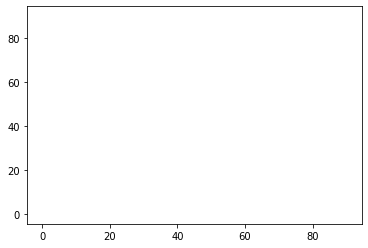

In [10]:
%matplotlib inline
dd =10
t = 0

plt.quiver(
    f.x[t,::dd,::dd],
    f.y[t,::dd,::dd],
    f.u[t,::dd,::dd],
    f.v[t,::dd,::dd]
)

plt.show()

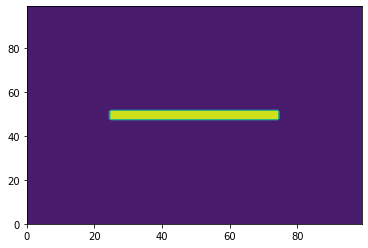

In [11]:
%matplotlib inline

t=0
dd=1
plt.contourf(
    f.x[t,::dd,::dd],
    f.y[t,::dd,::dd],
    f.c[t,::dd,::dd],
)

plt.show()

# 4. Run the computation

In [12]:
%%time
f.run()

99.5 %
Wall time: 13.2 s


# 5. Plot the results

<IPython.core.display.Javascript object>


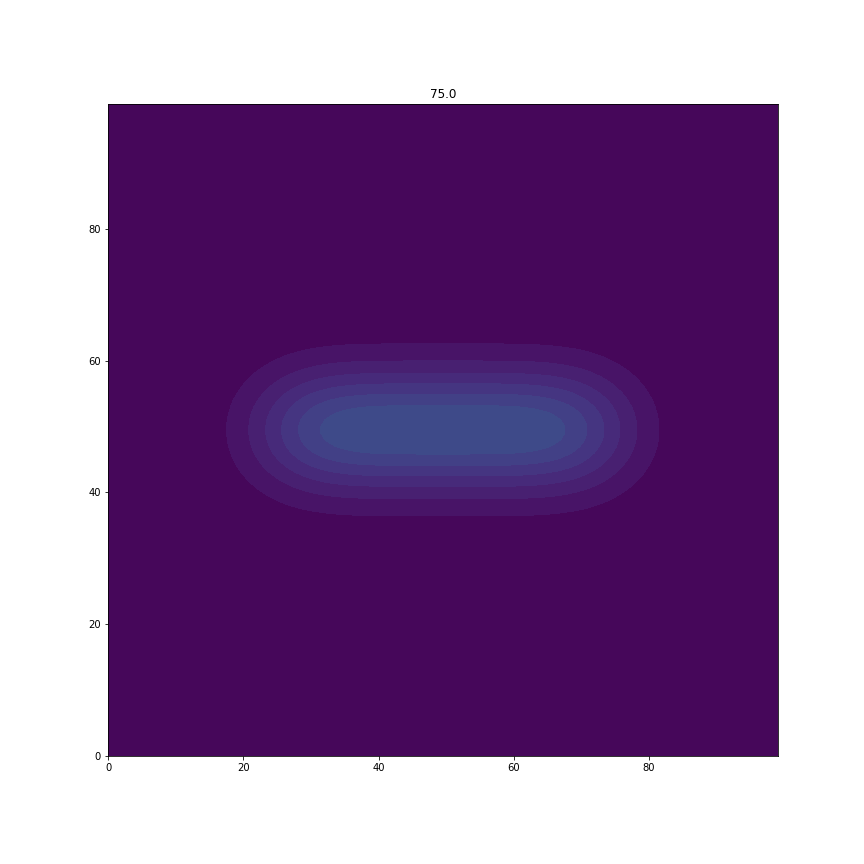

In [14]:
%matplotlib notebook

fig,ax = plt.subplots(figsize = (12,12))
cval = np.linspace(f.c.min(), f.c.max(), 30)
dd =1
DT = 10

def animate(i):
    t = i* DT
    ax.clear()
    ax.set_title(f"{np.round(f.t[t,0,0], 2)}") 
    CS1 = ax.contourf(
        f.x[t,::dd,::dd],
        f.y[t,::dd,::dd],
        f.c[t,::dd,::dd],
        levels=cval
    )


interval = 0.1  #in seconds     
ani = animation.FuncAnimation(
    fig,animate,
    int(f.x.shape[0]/DT),
    interval=interval*1e+3,
    blit=False
)

plt.show()